[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Dataset Shape: (50000, 2)

First 5 rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Missing values:
review       0
sentiment    0
dtype: int64

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


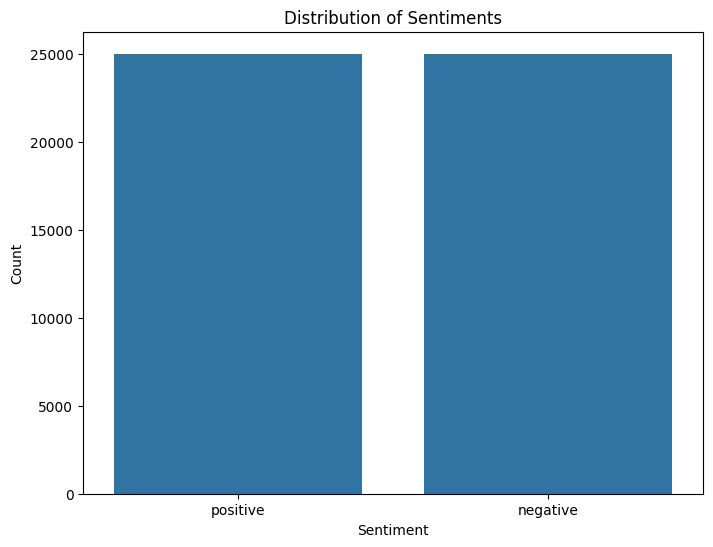


Review Length Statistics:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length, dtype: float64


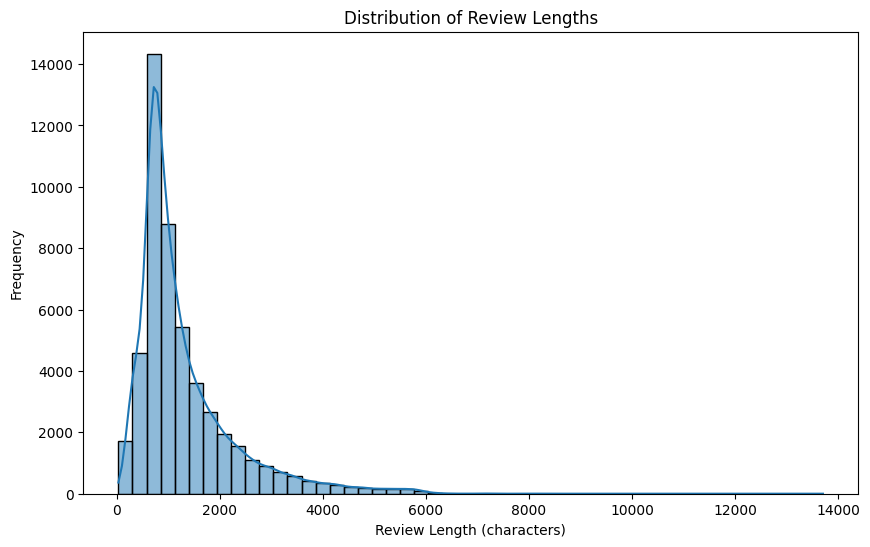

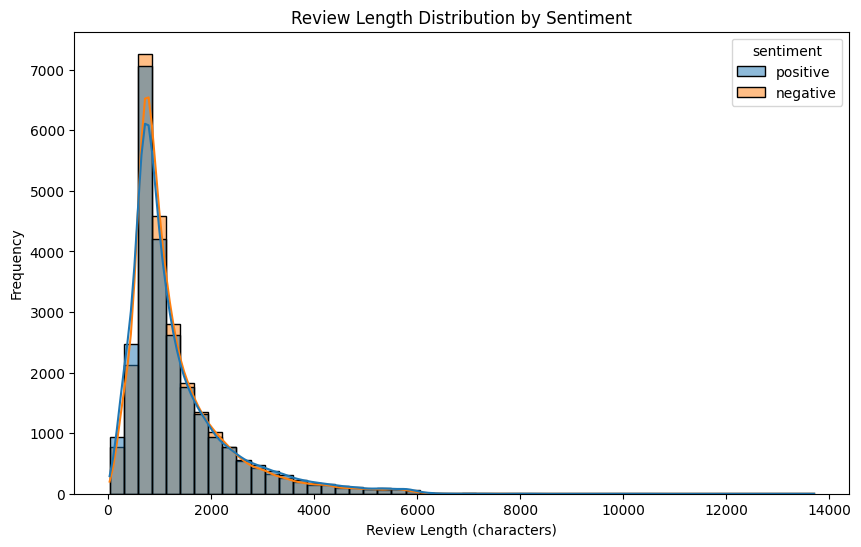

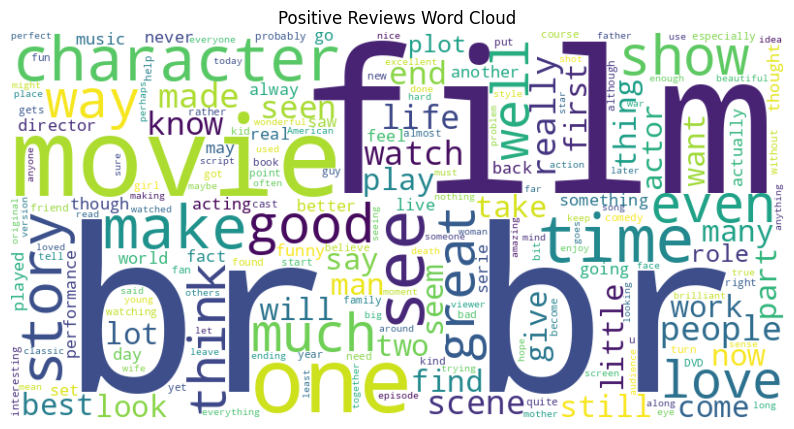

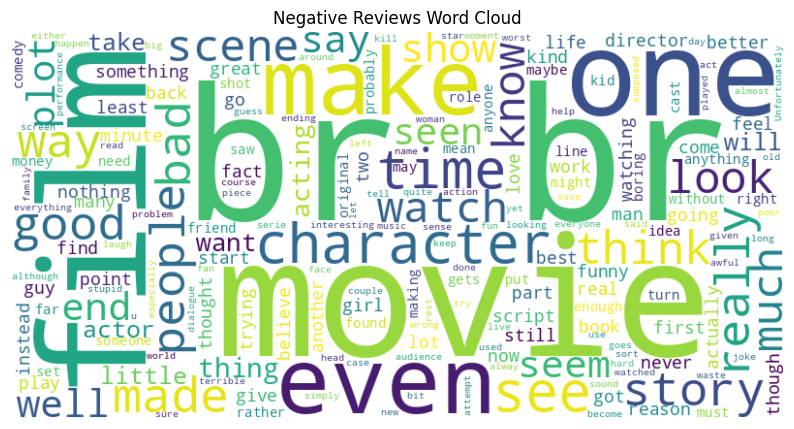


Most Common Words in Positive Reviews:
[('film', 39404), ('movie', 36013), ('one', 25726), ('like', 17055), ('good', 14342), ('great', 12639), ('story', 12371), ('see', 11862), ('time', 11769), ('well', 10969), ('really', 10672), ('also', 10545), ('would', 10368), ('even', 9362), ('much', 8993), ('first', 8860), ('films', 8453), ('love', 8396), ('people', 8364), ('best', 8291)]

Most Common Words in Negative Reviews:
[('movie', 47466), ('film', 35030), ('one', 24625), ('like', 21762), ('even', 14910), ('good', 14135), ('bad', 14062), ('would', 13628), ('really', 12211), ('time', 11487), ('see', 10562), ('dont', 10027), ('get', 9993), ('much', 9896), ('story', 9668), ('people', 9112), ('could', 9029), ('make', 8985), ('made', 8389), ('movies', 8345)]


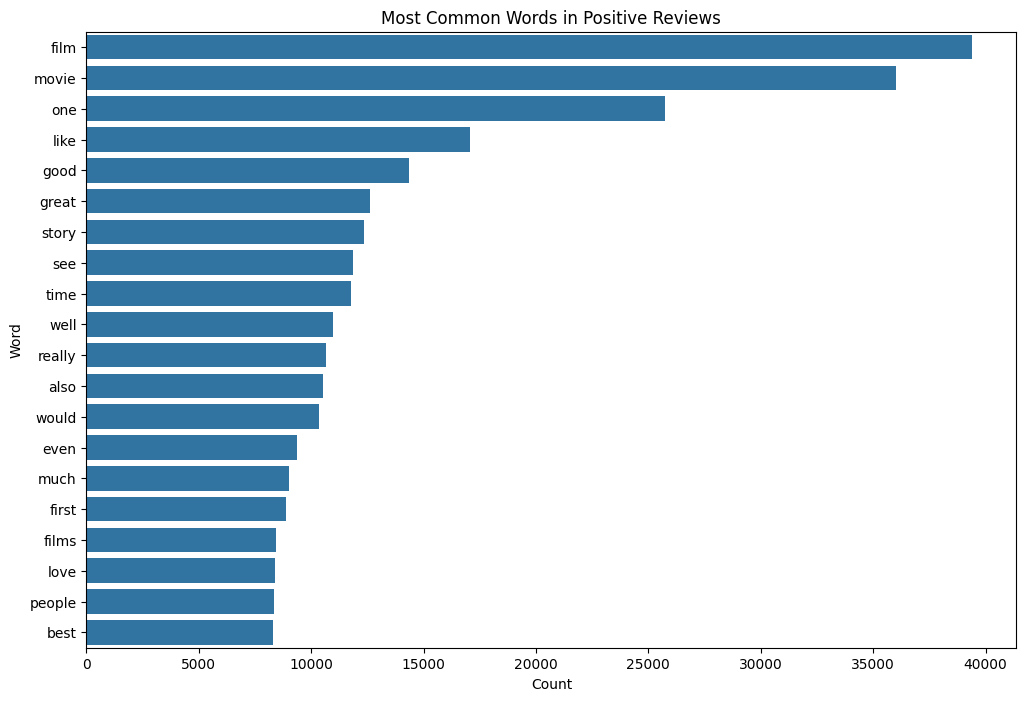

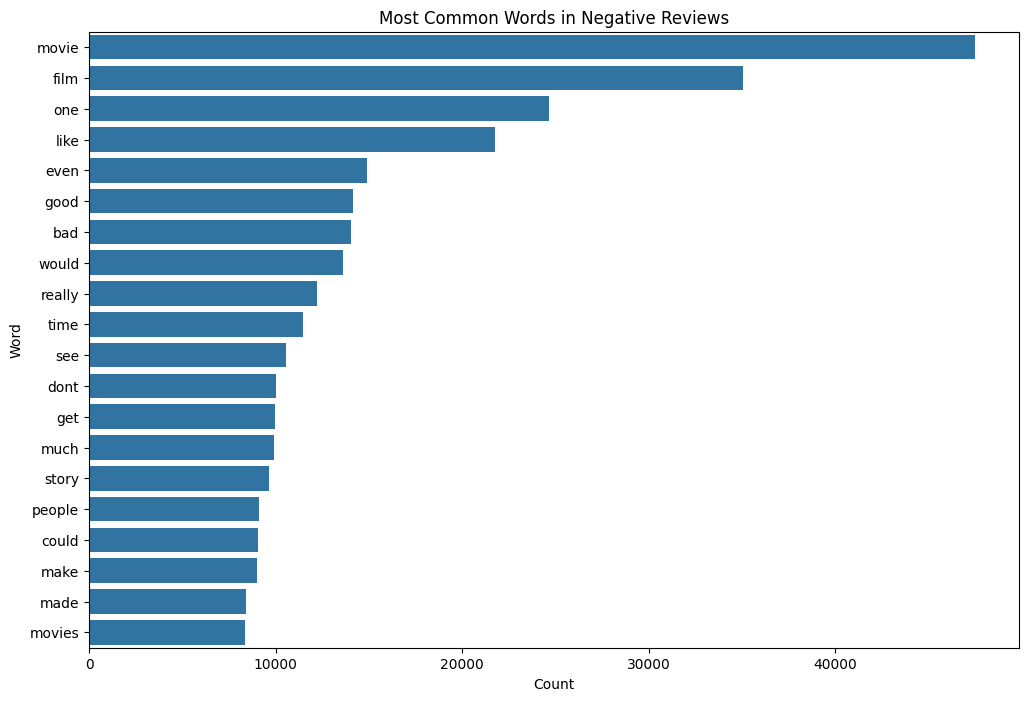

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download NLTK resources (only need to run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')  # Download the missing resource

# Define the file path
file_path = '/content/IMDB Dataset.csv'

# Load the dataset with robust error handling
try:
    # First try with standard parameters
    df = pd.read_csv(file_path)
except pd.errors.ParserError:
    try:
        # If that fails, try with additional parameters to handle quoting issues
        df = pd.read_csv(file_path, quoting=1, on_bad_lines='skip')
    except Exception as e:
        print(f"Second attempt failed with error: {e}")
        try:
            # If that still fails, try with more robust parameters
            df = pd.read_csv(file_path, quoting=1, on_bad_lines='skip', warn_bad_lines=True, encoding='utf-8')
        except Exception as e:
            print(f"Third attempt failed with error: {e}")
            # Last resort - use python engine which is slower but more robust
            print("Attempting to read with the Python engine (this may be slower)...")
            df = pd.read_csv(file_path, engine='python', quoting=1, on_bad_lines='skip')
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    # Handle other potential errors like FileNotFoundError
    raise

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Analyze the distribution of sentiments
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.savefig('sentiment_distribution.png')
plt.show()

# Calculate review lengths
df['review_length'] = df['review'].apply(len)

# Display statistics about review length
print("\nReview Length Statistics:")
print(df['review_length'].describe())

# Visualize review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.savefig('review_length_distribution.png')
plt.show()

# Compare review lengths between positive and negative reviews
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.savefig('review_length_by_sentiment.png')
plt.show()

# Display word clouds for positive and negative reviews
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.show()

# Generate word clouds
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])

generate_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')

# Display the most common words in positive and negative reviews
def get_most_common_words(text, n=20):
    # Clean and tokenize text
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Count word frequencies
    word_freq = Counter(filtered_tokens)
    return word_freq.most_common(n)

# Get most common words in positive and negative reviews
positive_common_words = get_most_common_words(positive_reviews)
negative_common_words = get_most_common_words(negative_reviews)

print("\nMost Common Words in Positive Reviews:")
print(positive_common_words)

print("\nMost Common Words in Negative Reviews:")
print(negative_common_words)

# Visualize most common words
def plot_most_common_words(common_words, title):
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts, y=words)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.show()

plot_most_common_words(positive_common_words, 'Most Common Words in Positive Reviews')
plot_most_common_words(negative_common_words, 'Most Common Words in Negative Reviews')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Preprocessing text data...
Text preprocessing completed.

Original vs Processed Reviews:

Original Review 1:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...

Processed Review 1:
one reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch reg...

Original Review 2:
A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...

Processed Review 2:
wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen got polari vo...

Original Rev

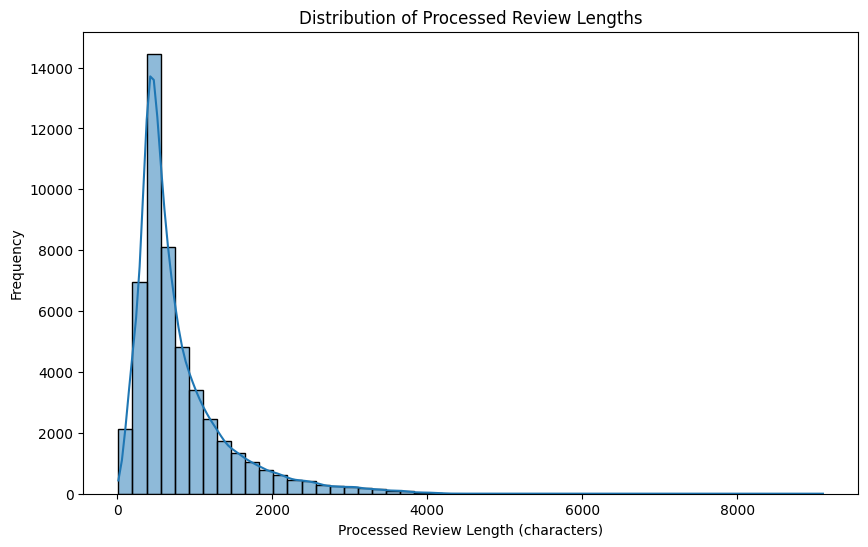

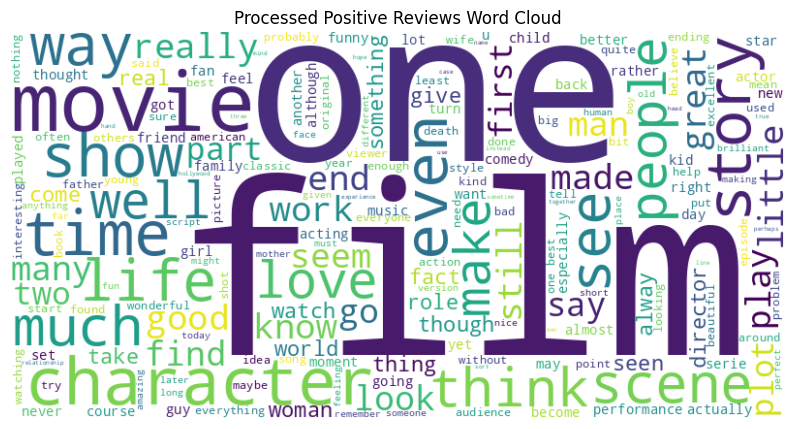

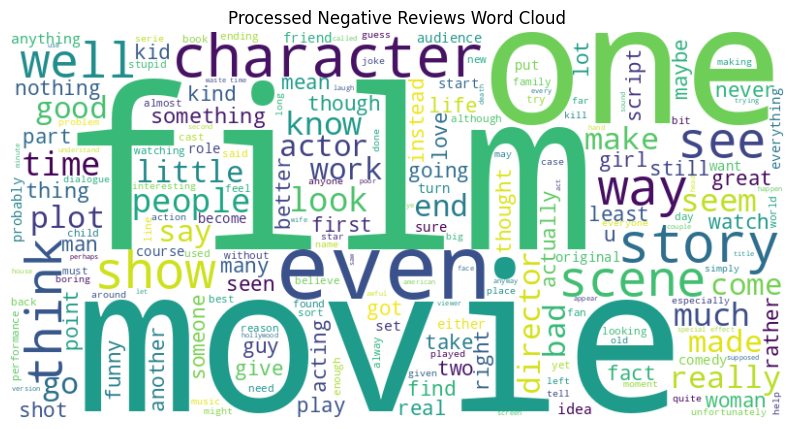


Most Common Words in Processed Positive Reviews:
[('film', 49693), ('movie', 44836), ('one', 28280), ('like', 18193), ('time', 16310), ('good', 15089), ('story', 14181), ('character', 14020), ('great', 13009), ('see', 12926), ('well', 12827), ('make', 11242), ('get', 11194), ('also', 10792), ('really', 10736), ('would', 10594), ('scene', 10054), ('life', 9897), ('show', 9664), ('even', 9613)]

Most Common Words in Processed Negative Reviews:
[('movie', 58403), ('film', 43735), ('one', 27152), ('like', 22927), ('even', 15244), ('time', 15146), ('good', 14763), ('bad', 14714), ('character', 14324), ('would', 14005), ('get', 13456), ('make', 12957), ('really', 12354), ('scene', 11378), ('see', 11138), ('story', 11082), ('much', 10115), ('people', 9537), ('thing', 9470), ('could', 9300)]


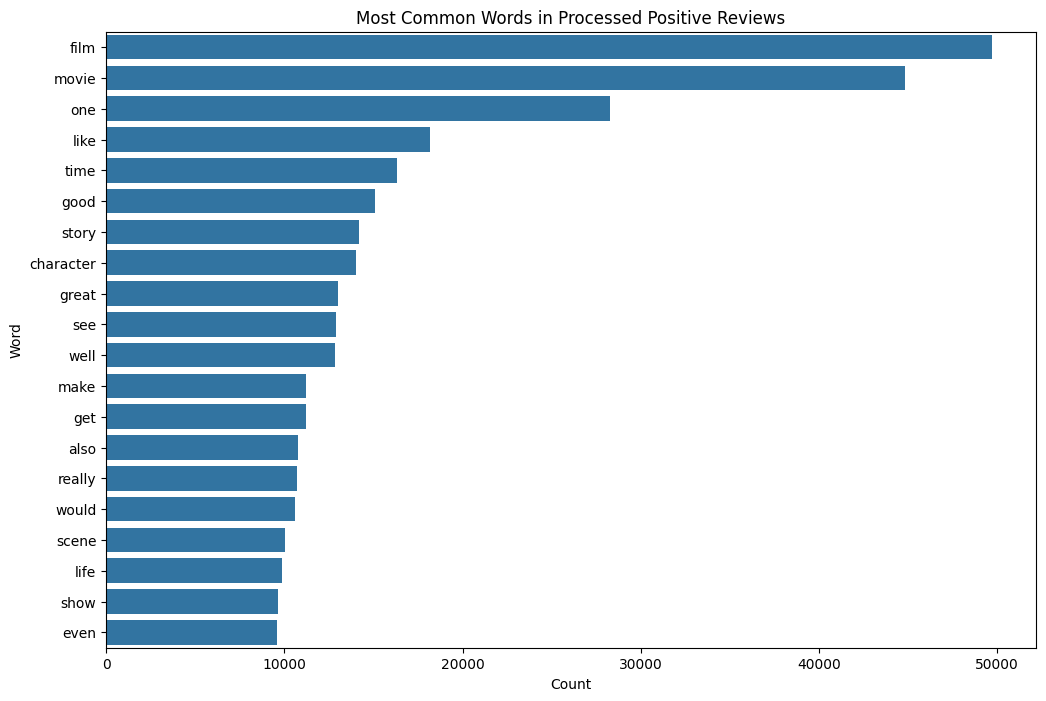

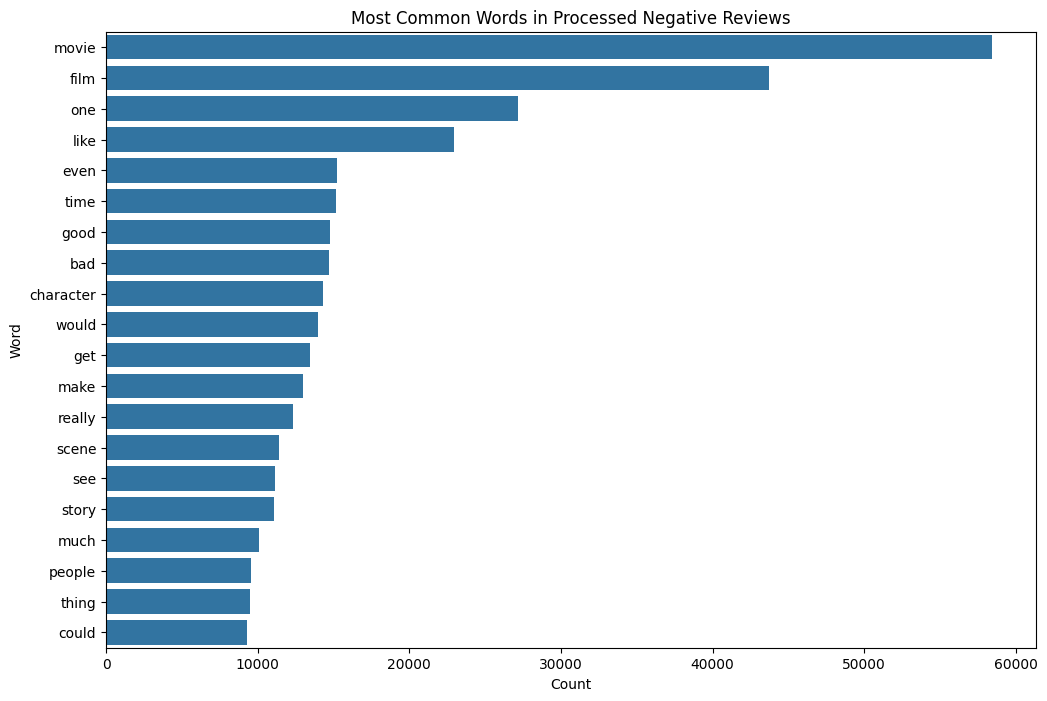


Preprocessed data saved to 'processed_imdb_reviews.csv'


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Download NLTK resources (only need to run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define the file path
file_path = '/content/IMDB Dataset.csv'

# Load the dataset
try:
    df = pd.read_csv(file_path)
except pd.errors.ParserError:
    df = pd.read_csv(file_path, quoting=1, on_bad_lines='skip')

# Calculate the length of original reviews
df['review_length'] = df['review'].apply(len)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join the tokens back into a string
    processed_text = ' '.join(filtered_tokens)

    return processed_text

# Apply preprocessing to the review column
print("Preprocessing text data...")
df['processed_review'] = df['review'].apply(preprocess_text)
print("Text preprocessing completed.")

# Display a few examples of original vs processed reviews
print("\nOriginal vs Processed Reviews:")
for i in range(3):
    print(f"\nOriginal Review {i+1}:")
    print(df['review'].iloc[i][:200] + "...")
    print(f"\nProcessed Review {i+1}:")
    print(df['processed_review'].iloc[i][:200] + "...")

# Calculate the length of processed reviews
df['processed_length'] = df['processed_review'].apply(len)

# Compare original vs processed review lengths
print("\nOriginal vs Processed Review Length Statistics:")
print("Original Length Stats:")
print(df['review_length'].describe())
print("\nProcessed Length Stats:")
print(df['processed_length'].describe())

# Visualize the distribution of processed review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['processed_length'], bins=50, kde=True)
plt.title('Distribution of Processed Review Lengths')
plt.xlabel('Processed Review Length (characters)')
plt.ylabel('Frequency')
plt.savefig('processed_review_length_distribution.png')
plt.show()

# Generate word clouds for processed positive and negative reviews
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.show()

# Generate word clouds for processed reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['processed_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['processed_review'])

generate_wordcloud(positive_reviews, 'Processed Positive Reviews Word Cloud')
generate_wordcloud(negative_reviews, 'Processed Negative Reviews Word Cloud')

# Display the most common words in processed positive and negative reviews
def get_most_common_words(text, n=20):
    tokens = text.split()
    word_freq = Counter(tokens)
    return word_freq.most_common(n)

# Get most common words in processed positive and negative reviews
positive_common_words = get_most_common_words(positive_reviews)
negative_common_words = get_most_common_words(negative_reviews)

print("\nMost Common Words in Processed Positive Reviews:")
print(positive_common_words)

print("\nMost Common Words in Processed Negative Reviews:")
print(negative_common_words)

# Visualize most common words
def plot_most_common_words(common_words, title):
    words = [word[0] for word in common_words]
    counts = [word[1] for word in common_words]

    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts, y=words)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.savefig(f'{title.lower().replace(" ", "_")}.png')
    plt.show()

plot_most_common_words(positive_common_words, 'Most Common Words in Processed Positive Reviews')
plot_most_common_words(negative_common_words, 'Most Common Words in Processed Negative Reviews')

# Save the preprocessed data for future use
df.to_csv('processed_imdb_reviews.csv', index=False)
print("\nPreprocessed data saved to 'processed_imdb_reviews.csv'")

Training set size: 40000
Testing set size: 10000

Transforming text data using TF-IDF...
TF-IDF transformation completed in 20.53 seconds

Shape of TF-IDF training data: (40000, 5000)
Shape of TF-IDF testing data: (10000, 5000)

Number of features: 5000
Sample features: ['abandoned' 'abc' 'ability' 'able' 'absence' 'absolute' 'absolutely'
 'absolutely nothing' 'absurd' 'abuse' 'abysmal' 'academy' 'academy award'
 'accent' 'accept' 'acceptable' 'accepted' 'accident' 'accidentally'
 'accompanied']

TF-IDF vectorizer saved to 'tfidf_vectorizer.pkl'

Training Logistic Regression...
Logistic Regression trained in 0.27 seconds
Accuracy: 0.8908
Precision: 0.8816
Recall: 0.9047
F1 Score: 0.8930


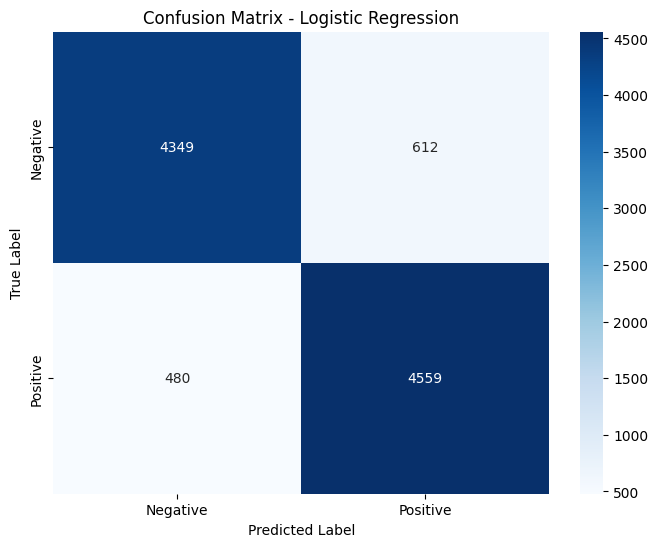

Logistic Regression model saved to 'logistic_regression_model.pkl'

Training Naive Bayes...
Naive Bayes trained in 0.04 seconds
Accuracy: 0.8580
Precision: 0.8493
Recall: 0.8732
F1 Score: 0.8611


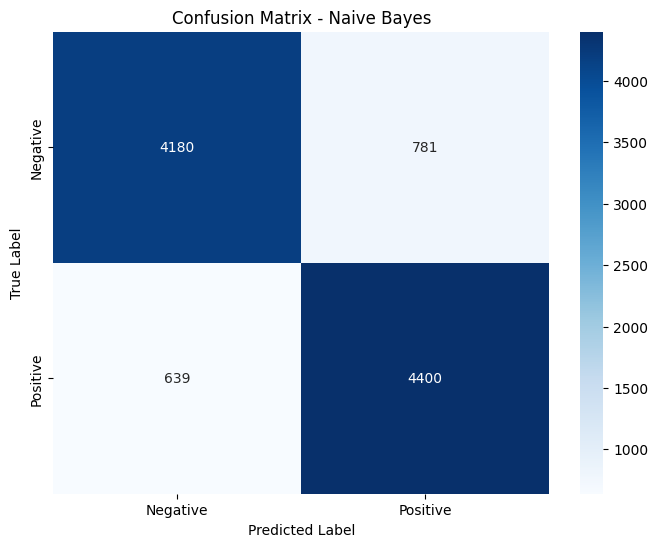

Naive Bayes model saved to 'naive_bayes_model.pkl'

Model Performance Comparison:
               Logistic Regression  Naive Bayes
accuracy                  0.890800     0.858000
precision                 0.881648     0.849257
recall                    0.904743     0.873189
f1_score                  0.893046     0.861057
training_time             0.269737     0.036986


<Figure size 1200x800 with 0 Axes>

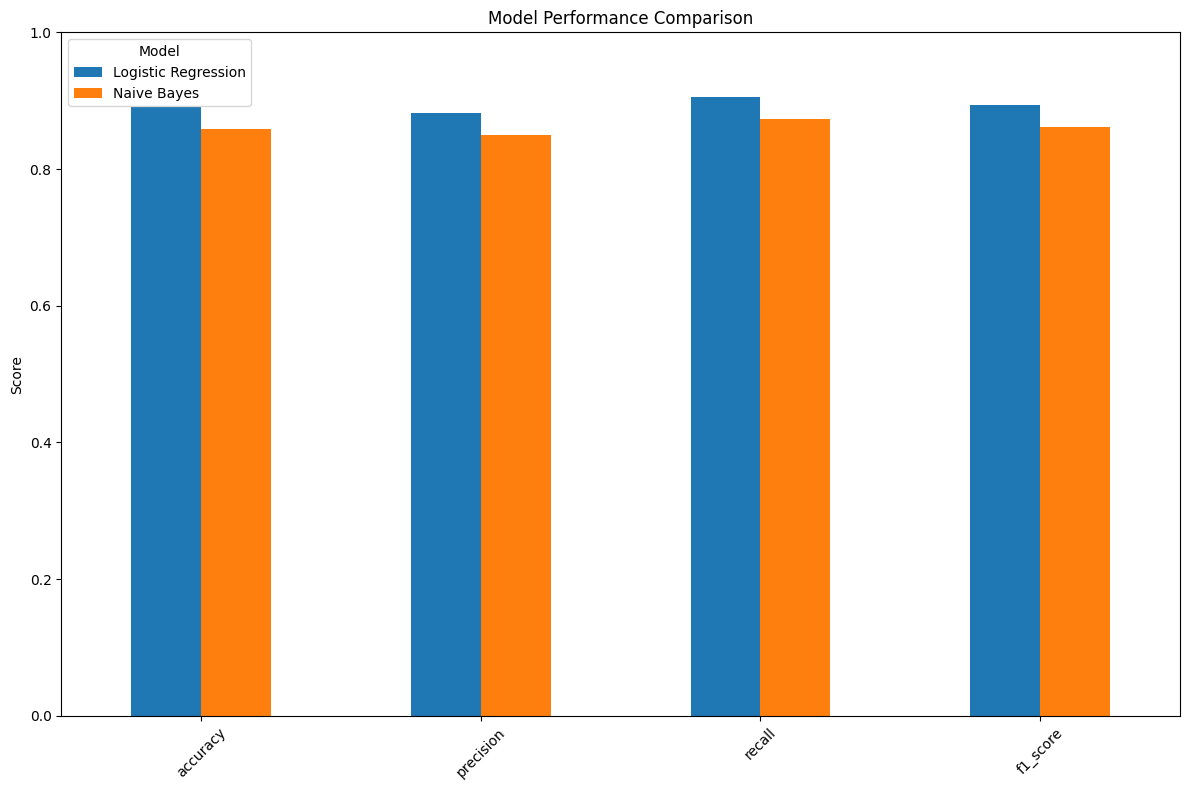


Best model based on F1 score: Logistic Regression
F1 Score: 0.8930
Best model saved to 'best_model.pkl'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import time

# Load the preprocessed data
df = pd.read_csv('processed_imdb_reviews.csv')

# Convert sentiment to binary (0 for negative, 1 for positive)
df['sentiment_binary'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'],
    df['sentiment_binary'],
    test_size=0.2,
    random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the training data
print("\nTransforming text data using TF-IDF...")
start_time = time.time()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
print(f"TF-IDF transformation completed in {time.time() - start_time:.2f} seconds")

# Display the shape of the transformed data
print(f"\nShape of TF-IDF training data: {X_train_tfidf.shape}")
print(f"Shape of TF-IDF testing data: {X_test_tfidf.shape}")

# Display some feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nNumber of features: {len(feature_names)}")
print("Sample features:", feature_names[:20])

# Save the TF-IDF vectorizer for future use
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)
print("\nTF-IDF vectorizer saved to 'tfidf_vectorizer.pkl'")

# Initialize models (SVM removed)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    start_time = time.time()

    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'training_time': time.time() - start_time
    }

    print(f"{name} trained in {results[name]['training_time']:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
    plt.show()

    # Save the trained model
    with open(f'{name.replace(" ", "_").lower()}_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    print(f"{name} model saved to '{name.replace(' ', '_').lower()}_model.pkl'")

# Compare model performance
print("\nModel Performance Comparison:")
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'training_time']
comparison_df = pd.DataFrame({name: [results[name][metric] for metric in metrics]
                             for name in results.keys()},
                            index=metrics)
print(comparison_df)

# Visualize model performance
plt.figure(figsize=(12, 8))
metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
comparison_df.loc[metrics_to_plot].plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('model_performance_comparison.png')
plt.show()

# Identify the best model based on F1 score
best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
best_model = models[best_model_name]
print(f"\nBest model based on F1 score: {best_model_name}")
print(f"F1 Score: {results[best_model_name]['f1_score']:.4f}")

# Save the best model with a special name
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print(f"Best model saved to 'best_model.pkl'")

Performing hyperparameter tuning for Logistic Regression...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Grid search completed in 1989.66 seconds

Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation F1 score: 0.8876

Training the optimized model...
Optimized model trained in 0.72 seconds

Optimized Model Performance:
Accuracy: 0.8912
Precision: 0.8826
Recall: 0.9043
F1 Score: 0.8934


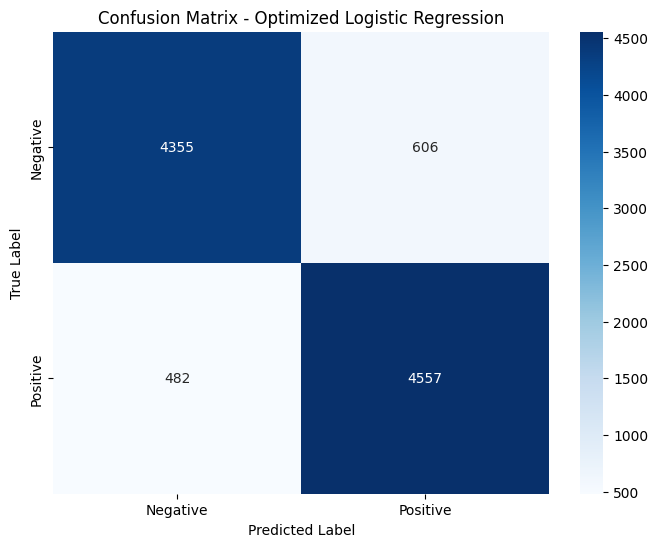


Optimized model saved to 'optimized_model.pkl'

Model Comparison:
Original Model F1 Score: 0.8930
Optimized Model F1 Score: 0.8934
Improvement: 0.03%


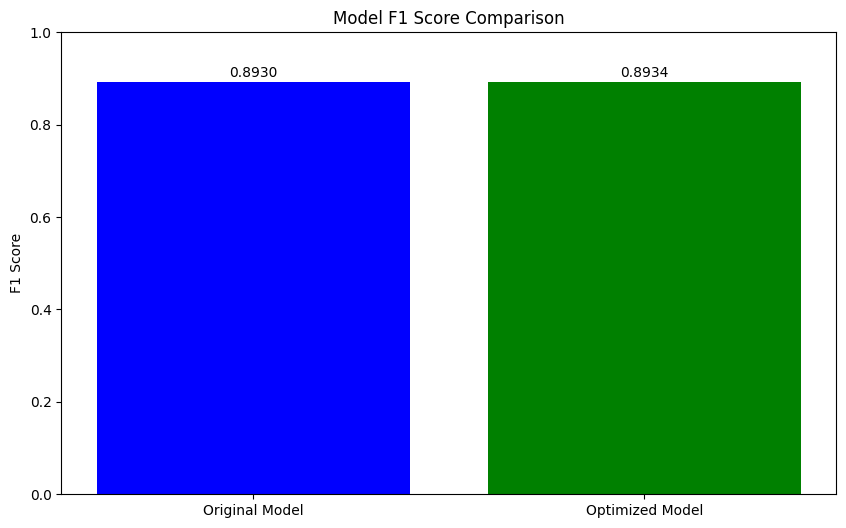

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pickle
import time

# Load the preprocessed data
df = pd.read_csv('processed_imdb_reviews.csv')

# Convert sentiment to binary (0 for negative, 1 for positive)
df['sentiment_binary'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_review'],
    df['sentiment_binary'],
    test_size=0.2,
    random_state=42
)

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

# Transform the data using the loaded vectorizer
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
print("Performing hyperparameter tuning for Logistic Regression...")
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search to the data
start_time = time.time()
grid_search.fit(X_train_tfidf, y_train)
print(f"Grid search completed in {time.time() - start_time:.2f} seconds")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest parameters: {best_params}")
print(f"Best cross-validation F1 score: {best_score:.4f}")

# Train a new model with the best parameters
best_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    **best_params
)

print("\nTraining the optimized model...")
start_time = time.time()
best_model.fit(X_train_tfidf, y_train)
print(f"Optimized model trained in {time.time() - start_time:.2f} seconds")

# Make predictions with the optimized model
y_pred = best_model.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nOptimized Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Optimized Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_optimized_model.png')
plt.show()

# Save the optimized model
with open('optimized_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("\nOptimized model saved to 'optimized_model.pkl'")

# Compare with the original model
with open('logistic_regression_model.pkl', 'rb') as file:
    original_model = pickle.load(file)

y_pred_original = original_model.predict(X_test_tfidf)
f1_original = f1_score(y_test, y_pred_original)

print("\nModel Comparison:")
print(f"Original Model F1 Score: {f1_original:.4f}")
print(f"Optimized Model F1 Score: {f1:.4f}")
print(f"Improvement: {(f1 - f1_original) * 100:.2f}%")

# Visualize the comparison
plt.figure(figsize=(10, 6))
models = ['Original Model', 'Optimized Model']
f1_scores = [f1_original, f1]
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center')
plt.savefig('model_f1_comparison.png')
plt.show()